## 1. Logistic Regression

In this section we are working with Bank Marketing Dataset: https://archive.ics.uci.edu/ml/datasets/bank+marketing

Two pairs of training and validation sets have been drawn from this dataset, namely: 
 -  `train_1.csv` and `valid_1.csv`
 -  `train_2.csv`and `valid_2.csv`
 
Finally, we have a `test.csv` which is common for both settings.


### Data Preprocessing

We aim to address the following as a part of data preprocessing:

1. Find features that have continuous numeric values and normalize them.
2. Find the categorical features and process them.
3. Find the features which have missing values.



In [131]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


#Loading data from csv
train_1=pd.read_csv(os.path.join(os.getcwd(),"train_1.csv"))
train_2=pd.read_csv(os.path.join(os.getcwd(),"train_2.csv"))
valid_1=pd.read_csv(os.path.join(os.getcwd(),"valid_1.csv"))
valid_2=pd.read_csv(os.path.join(os.getcwd(),"valid_2.csv"))
test=pd.read_csv(os.path.join(os.getcwd(),"test.csv"))

datasets=[train_1,train_2,valid_1,valid_2,test]

#Mean Imputation for 'pdays' column
for set in datasets:
    set['pdays'].replace(to_replace=-1,value=set['pdays'].mean(),inplace=True)

num_cols=['age','balance','day','duration','campaign','pdays','previous']
#Normalizing numeric columns
for col in num_cols:
        train_1[col]=(train_1[col]-train_1[col].mean())/train_1[col].max()
        train_2[col]=(train_2[col]-train_2[col].mean())/train_2[col].max()
        valid_1[col]=(valid_1[col]-valid_1[col].mean())/valid_1[col].max()
        valid_2[col]=(valid_2[col]-valid_2[col].mean())/valid_2[col].max()
        test[col]=(test[col]-test[col].mean())/test[col].max()

#Binary replacement
bin_cols=['default','housing','loan','y']
for set in datasets:
    for col in bin_cols:
        set[col].replace(to_replace='yes',value='1',inplace=True)
        set[col].replace(to_replace='no',value='0',inplace=True)

#OneHotEncoding
#Concepts of OneHotEncoding are referred from http://www.insightsbot.com/blog/zuyVu/python-one-hot-encoding-with-pandas-made-simple
cat_cols=['job','marital','education','contact','month','poutcome']
def oneHotEncoder(set):
    for col in cat_cols:
            set=pd.concat([set,pd.get_dummies(set[col], prefix=col)],axis=1)
            set.drop([col],axis=1, inplace=True)
    return set

train_1=oneHotEncoder(train_1)
train_2=oneHotEncoder(train_2)
valid_1=oneHotEncoder(valid_1)
valid_2=oneHotEncoder(valid_2)
test=oneHotEncoder(test)


#Moving y column to the beginning
def moveCol(set):
    c=list(set)
    c.insert(0,c.pop(c.index('y')))
    set=set.loc[:,c]
    return set

train_1=moveCol(train_1)
train_2=moveCol(train_2)
valid_1=moveCol(valid_1)
valid_2=moveCol(valid_2)
test=moveCol(test)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       # PROBLEM 1, TASK 1 CODE GOES HERE

### Model $\mathcal{A}$

Train a logistic regression model with $L_2$ regularization on `train_1.csv`. Use the validation set `valid_1.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

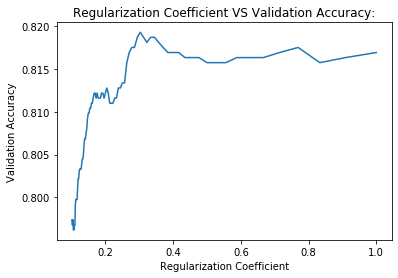

Maximum Accuracy achieved on valid_1 set: 0.8192557590076787
Coefficient Corresponding to Maximum Accuracy:  0.3030303030303028
Prediction Accuracy(on test data):  0.7806037819307752


In [283]:
inv_regParam=np.arange(1,10,0.1)
score=[]
regParam=[]
for i in inv_regParam:
    logReg=LogisticRegression(penalty='l2',C=1/i,solver='lbfgs',max_iter=500)
    logReg.fit(train_1.iloc[:,1:],train_1['y'])
    logReg.predict(valid_1.iloc[:,1:])
    regParam.append(1/i)
    score.append(logReg.score(valid_1.iloc[:,1:],valid_1['y']))


plt.plot(regParam,score)
plt.title('Regularization Coefficient VS Validation Accuracy:')
plt.xlabel('Regularization Coefficient')
plt.ylabel('Validation Accuracy')
plt.show()

print('Maximum Accuracy achieved on valid_1 set:',max(score))
print("Coefficient Corresponding to Maximum Accuracy: ",regParam[score.index(max(score))])
best_lambda=regParam[score.index(max(score))]
logReg=LogisticRegression(penalty='l2',C=best_lambda,solver='lbfgs',max_iter=500)
logReg.fit(train_1.iloc[:,1:],train_1['y'])
logReg.predict(test.iloc[:,1:])
print("Prediction Accuracy(on test data): ",logReg.score(test.iloc[:,1:],test['y']))

### Model $\mathcal{B}$
Train a logistic regression model with $L_2$ regularization on `train_2.csv`. Use the validation set `valid_2.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

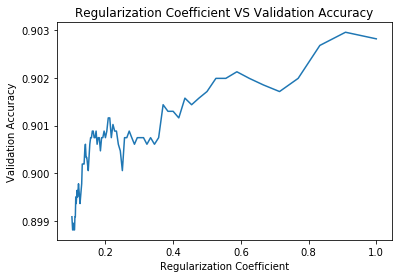

Maximum Accuracy achieved on valid_2 set:  0.9029582526956041
Coefficient Corresponding to Maximum Accuracy:  0.9090909090909091
Prediction Accuracy (on test data):  0.9024659957978547


In [284]:
inv_regParam=np.arange(1,10,0.1)
score=[]
regParam=[]
for i in inv_regParam:
    logReg=LogisticRegression(penalty='l2',C=1/i,solver='lbfgs',max_iter=500)
    logReg.fit(train_2.iloc[:,1:],train_2['y'])
    logReg.predict(valid_2.iloc[:,1:])
    regParam.append(1/i)
    score.append(logReg.score(valid_2.iloc[:,1:],valid_2['y']))


plt.plot(regParam,score)
plt.title('Regularization Coefficient VS Validation Accuracy')
plt.xlabel('Regularization Coefficient')
plt.ylabel('Validation Accuracy')
plt.show()

print("Maximum Accuracy achieved on valid_2 set: ",max(score))
print("Coefficient Corresponding to Maximum Accuracy: ",regParam[score.index(max(score))])
best_lambda=regParam[score.index(max(score))]
logReg=LogisticRegression(penalty='l2',C=best_lambda,solver='lbfgs',max_iter=500)
logReg.fit(train_2.iloc[:,1:],train_2['y'])
logReg.predict(test.iloc[:,1:])
print("Prediction Accuracy (on test data): ",logReg.score(test.iloc[:,1:],test['y']))

### Model $\mathcal{C}$
Due to the specific (and smart) choice of the loss function, a logistic regression classifier happens to predict the posterioir probability $p(y|\mathbf{x})$ for any given sample. It then classifies the samples with $p(y|\mathbf{x}) > 0.5$ as belonging to class $1$ and the rest as belonging to class $0$. Instead, for a fixed threshold of $0.5$, let us consider a dynamic threshold of $\theta$ which can be chosen after a model has been trained.

$$
\ y=
\begin{cases}
1 \text{ if } p(y|\mathbf{x}) \geq \theta \\
\\
0 \text{ if } p(y|\mathbf{x}) < \theta \\
\end{cases}
$$

for $0 \leq \theta \leq 1$.

Let us train a logistic regression model with $L_2$ regularization on `train_2.csv`. Use the validation set `valid_2.csv` to choose the best combination of regularization coefficient $\lambda$ and the threshold $\theta$. The best coefficients shall be selected after trying out at least five, non-consecutive values.

Maximum Accuracy achieved on valid_2 set:  1.0
Regularization Coefficient Corresponding to Maximum Accuracy:  1.0
Threshold Corresponding to Maximum Accuracy:  0.5
Final Prediction Accuracy: 1.0


***Below graphs show the model accuracy with different values of theta and lambda. We need to select the best pair of theta and lambda which results in maximum accuracy***


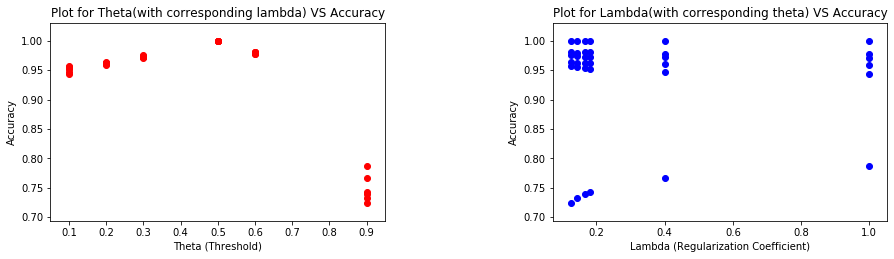

In [285]:
threshold=[0.2,0.5,0.9,0.1,0.6,0.3]
inv_regParam=[1.0,6.0,7.0,5.5,8.0,2.5]
y=[]
score=[]
theta=[]
lambda1=[]
for i in range(len(threshold)):
    for j in range(len(inv_regParam)):
        logReg=LogisticRegression(penalty='l2',C=1/inv_regParam[j],solver='lbfgs',max_iter=1000)
        logReg.fit(train_2.iloc[:,1:],train_2['y'])
        predictions = (logReg.predict_proba(valid_2.iloc[:,1:]) >= threshold[i]).astype(int)
        for k in predictions:
            if k[0]==1:
                y.append('0')
            else:
                y.append('1')
        score.append(logReg.score(valid_2.iloc[:,1:],y))
        theta.append(threshold[i])
        lambda1.append(1/inv_regParam[j])
        y=[]


max_index=score.index(max(score))
maxLambda=lambda1[max_index]
maxThreshold=theta[max_index]


fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(15)
fig.subplots_adjust(wspace=0.5)
plt.subplot(2, 2, 1)
plt.scatter(theta,score,c='r')
plt.title('Plot for Theta(with corresponding lambda) VS Accuracy')
plt.xlabel('Theta (Threshold)')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.scatter(lambda1,score,c='b')
plt.title('Plot for Lambda(with corresponding theta) VS Accuracy')
plt.xlabel('Lambda (Regularization Coefficient)')
plt.ylabel('Accuracy')

print("Maximum Accuracy achieved on valid_2 set: ",max(score))
print("Regularization Coefficient Corresponding to Maximum Accuracy: ",maxLambda)
print("Threshold Corresponding to Maximum Accuracy: ",maxThreshold)

logReg=LogisticRegression(penalty='l2',C=maxLambda,solver='lbfgs',max_iter=500)
logReg.fit(train_2.iloc[:,1:],train_2['y'])
predictions = (logReg.predict_proba(test.iloc[:,1:]) >= maxThreshold).astype(int)
y=[]
for k in predictions:
    if k[0]==1:
        y.append('0')
    else:
        y.append('1')
print("Final Prediction Accuracy:",logReg.score(test.iloc[:,1:],y))
print("\n")
print("***Below graphs show the model accuracy with different values of theta and lambda. We need to select the best pair of theta and lambda which results in maximum accuracy***")

### Report and Conclusion

1.  A detailed report on the performance (that is, accuracy) of Models $\mathcal{A}$, $\mathcal{B}$ and $\mathcal{C}$ on the respective training sets, the validation sets and finally the test.


       Model A and Model B:

       i) Regularization parameter is used to avoid the possible problem of model-overfitting. Choosing a best value for the regularization leads to a good-fit of the model.

       ii) In model A and Model B we are making use of the train_1 and train_2 datasets respectively, to fit the model with various values of regularization coefficients and using cross validation datasets valid_1 and valid_2 to predict the values and compute accuracy of our model with each of the corresponding regularization parameter. 

       iii) Then we are selecting the regularization coefficient corresponding to the maximum accuracy obtained on the cross validation (valid_1 and valid_2) datasets, and using that coefficient to predict the values of test dataset so that our model do not overfit.

       iv) With the good selection of regularization parameter we will get similar accuracies for both train and test datasets.

       v) Model A has achieved a maximum accuracy score of around 0.81925 on validation set, with the regularization coefficient 0.30303, and model A's accuracy on test set is around 0.78060

       vi) Model B had achieved a maximum accuracy score of around 0.90295 on validation set, with the regularization coefficient 0.90909, and model B's accuracy on test set is around 0.90246

       Model C:

       i) Logistic regression selects a probability threshold with which it classifies the values into different classes.

       ii) In model C we are comparing the different values for this threshold along with different values for regularization coefficients to check how they affect the classificaton.

       iii) We are selecting a best pair of threshold 𝜃 and regularizatoin coefficient 𝜆 which leads to a highest accuracy of prediction on cross validation set.

       iv) Then we are using this best pair pf parameters to predict the values of test set and computing its accuracy and comparing it against the cross validation accuracy to determine whether our model has a good-fit.

       v) We obtained a maximum accuracy 1.0 with the threshold 0.5 and regularization coefficient 1.0.

       vi) Finally using this pair of parameters we have obtained a prediction accuracy of 1.0 on our test dataset.
       
       
       

2.  Is 'accuracy', the metric which we have used to find the best hyperparameter in all the above tasks, a good metric in this scenario?

    Ans:
    Depending on our situation accuracy is not be a best metric,
    
    Accuracy is a good metric when the dataset is balanced.
    
    i) Datasets train_1 and valid_1 are balanced (even distribution of y), but the test set is imbalanced (uneven distribution of y). So in model A even though accuracy is a good metric for cross validation, it is not a best metric for test set prediction.
    
    ii) Datasets train_2 and valid_2 are imbalanced (uneven distribution of y), so it makes accuracy not an optimal metric for evaluating our model B and model C.
   
    


# Polynomial Regression


Consider a regression problem in which the input variable $x$ has only one feature and the target variable $y$ is generated from the input variable $x$ by a polynomial $f(x)$. The function $f$ is such that $$f(x) = \sum_{i=0}^d w_ix^i$$ Please note that a given polynomial function can be completely described by the vector of coefficients $\mathbf{w}$.


**Let us write a function in python which can take the degree of polynomial function as input.

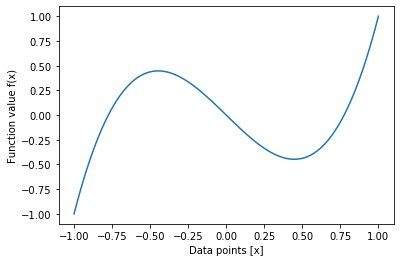

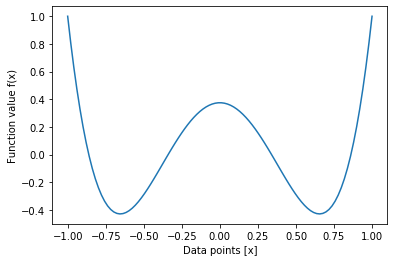

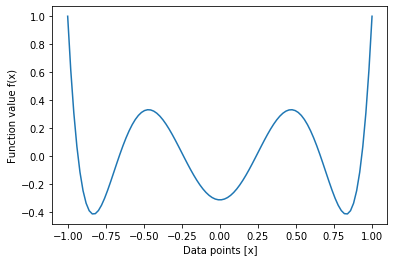

In [135]:
import numpy as np
from scipy.special import legendre

def get_coefficients(degree):
    """
    The coefficients returned are in the order w_0, w_1, ... , w_{degree}
    """
    return legendre(degree).coefficients[::-1]

def visualize_function(degree, low, high):
    w = get_coefficients(degree)
    x=np.linspace(low,high,num=100)
    res=[]
    for i in range(len(x)):
        x_arr=[]
        for j in range(1,degree+1):
            x_arr.append(x[i]**j)
        x_arr.insert(0,1)
        res.append(x_arr)
    fx=[]
    for i in res:
        fx.append(np.matmul(i,np.transpose(w)))

    plt.plot(x,fx)
    plt.xlabel('Data points [x]')
    plt.ylabel('Function value f(x)')
    plt.title('')
    plt.show()
    
## TEST CASES (The following lines should plot a function)
visualize_function(3, -1, 1)
visualize_function(4, -1, 1)
visualize_function(6, -1, 1)


**Let us write a function in python that randomly generates a dataset (training data + test data). The function will take the degree of target polynomial as input along with the number of points that should be generated for both the training and the test sets. The polynomial will be represented by the vector of coefficients. The function will also add random normal noise to the target -- i.e. the noise is drawn from a normal distribution with mean $\mu=0$ and standard deviation = $\sigma^2$. Thus: 
$$y=\sum_{i=0}^d w_ix^i + \mathcal{N}(0, \sigma^2)$$



In [254]:
def generate(size,degree,sigma,w):
    x=np.random.rand(size)
    x.sort()
    noise=np.random.normal(0, sigma, size)
    res=[]
    for i in range(len(x)):
        x_arr=[]
        for j in range(1,degree+1):
            x_arr.append(x[i]**j)
        x_arr.insert(0,1)
        res.append(x_arr)
    y=[]
    for i in res:
        y.append(np.matmul(i,np.transpose(w)))

    #Adding noise
    y=np.add(y,noise)
    return x,y

def generate_dataset(degree, n_train, n_test, sigma):
    """
    - n_train - Number of training samples
    - n_test - Number of test samples
    - X_train is an array of size (n_train $\times$ 1)
    - y_train is an array of size (n_train $\times$ 1)
    - X_test is an array of size (n_test $\times$ 1)
    - y_test is an array of size (n_test $\times$ 1)
    """
    w = get_coefficients(degree)
    X_train,y_train=generate(n_train,degree,sigma,w)
    X_test,y_test=generate(n_test,degree,sigma,w)
    return X_train, y_train, X_test, y_test

1. Let us use the function written above to generate a dataset of degree $10$, with $20$ samples each in the training and test sets with standard deviation of the noise $0.2$.

2. And then fit two linear regressions models: $\mathcal{A}$ and $\mathcal{B}$ on the given training data. Model $\mathcal{A}$ is quadratic and Model $\mathcal{B}$  is of degree $10$.

3. Then calculate the training error and testing error on both these models and report them nicely in a table.

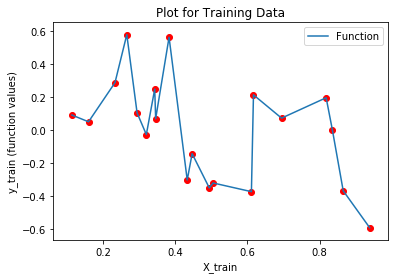

In [255]:
X_train, y_train, X_test, y_test=generate_dataset(10,20,20,0.2)


plt.scatter(X_train,y_train,c='r')
plt.plot(X_train,y_train,label='Function')
plt.title('Plot for Training Data')
plt.xlabel('X_train')
plt.ylabel('y_train (function values)')
plt.legend()
plt.show()


Degree 2 Model,Train Error,Test Error
Mean Squared Error,0.07171137457017561,0.16796219405676563


Degree 10 Model,Train Error,Test Error
Mean Squared Error,0.028667895470311105,33.96158647647631


Degree 20 Model,Train Error,Test Error
Mean Squared Error,0.003837867802691445,5603912168.792612


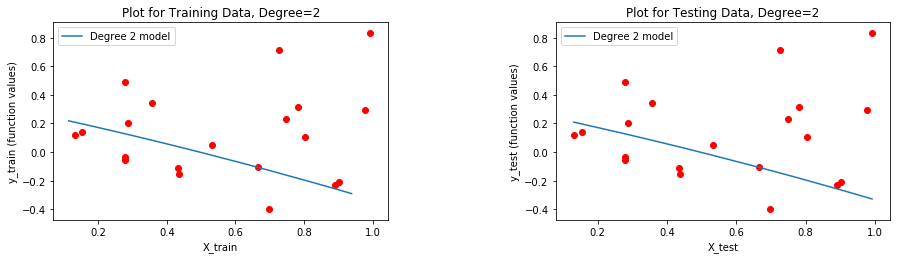

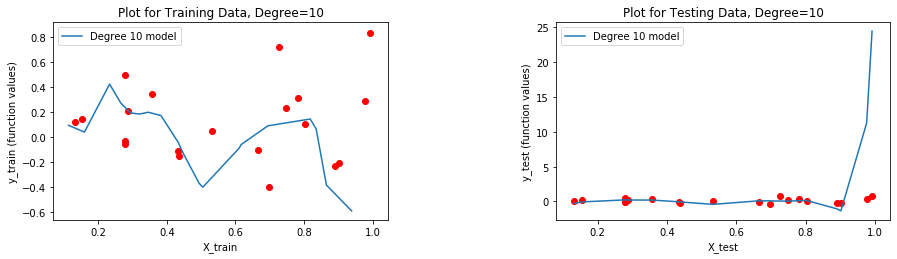

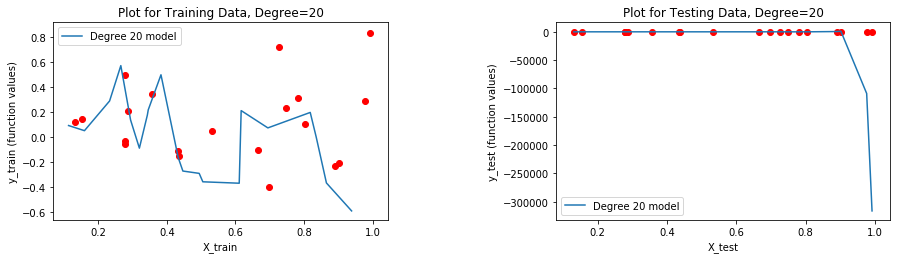

In [256]:
#!pip install tabulate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as mse
from IPython.display import HTML, display
import tabulate


def fit_model(degree):
    polynomial_features = PolynomialFeatures(degree)
    X_train_transformed = polynomial_features.fit_transform(X_train.reshape(-1,1))
    X_test_transformed = polynomial_features.fit_transform(X_test.reshape(-1,1))
    
    model = LinearRegression()
    model.fit(X_train_transformed,y_train)
    Y_tr=model.predict(X_train_transformed)
    mse_train=mse(y_train,Y_tr)
    #print("Training Error: ",mse(y_train,Y_tr))

    Y_ts=model.predict(X_test_transformed)
    #print("Testing Error: ",mse(y_test,Y_ts))
    mse_test=mse(y_test,Y_ts)
    
    fig = plt.figure()
    fig.set_figheight(8)
    fig.set_figwidth(15)
    fig.subplots_adjust(wspace=0.5)
    plt.subplot(2, 2, 1)
    plt.scatter(X_test,y_test,c='r')
    plt.plot(X_train,Y_tr,label='Degree %d model'%degree)
    plt.title('Plot for Training Data, Degree=%d'%degree)
    plt.xlabel('X_train')
    plt.ylabel('y_train (function values)')
    plt.legend(loc='best')

    plt.subplot(2, 2, 2)
    plt.scatter(X_test,y_test,c='r')
    plt.plot(X_test,Y_ts,label='Degree %d model'%degree)
    plt.title('Plot for Testing Data, Degree=%d'%degree)
    plt.xlabel('X_test')
    plt.ylabel('y_test (function values)')
    plt.legend(loc='best')
    
    
      

    model="Degree %d Model"%degree  
    table = [[model,"Train Error","Test Error"],
             ["Mean Squared Error",mse_train,mse_test],
            ]
    display(HTML(tabulate.tabulate(table, tablefmt='html')))
    print()

fit_model(2)
fit_model(10)

#for experimenting purpose
fit_model(20)

Adding noise to our dataset result in overfitting as our learning algorithm picks up the noise and fails to genaralize on a new test set.
Hence the results are as expected.

--> With added noise, our model will overfit.

--> We can clearly observe this phenomenon by testing with new models of degree 20,25... which fails to predict the values within the test set. (High test error of the order 13145674.410314867 etc.)
 
--> If we remove the noise, we can observe that all our models have a near-perfect fit. 




**Let us generate a dataset of degree 45, with 20 samples each in the training and test sets with no noise in the samples.

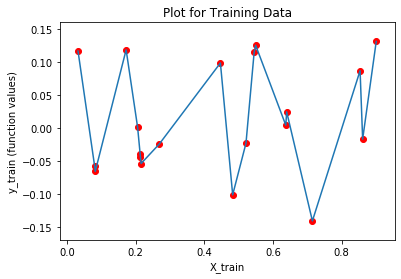

In [278]:
def generate_noNoise(size,degree,w):
    x=np.random.rand(size)
    x.sort()
    res=[]
    for i in range(len(x)):
        x_arr=[]
        for j in range(1,degree+1):
            x_arr.append(x[i]**j)
        x_arr.insert(0,1)
        res.append(x_arr)
    y=[]
    for i in res:
        y.append(np.matmul(i,np.transpose(w)))
    return x,y

def generate_dataset_noNoise(degree, n_train, n_test):
    w = get_coefficients(degree)
    X_train,y_train=generate_noNoise(n_train,degree,w)
    X_test,y_test=generate_noNoise(n_test,degree,w)
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test=generate_dataset_noNoise(45,20,20)
plt.scatter(X_train,y_train,c='r')
plt.plot(X_train,y_train)
plt.title('Plot for Training Data')
plt.xlabel('X_train')
plt.ylabel('y_train (function values)')
plt.show()


Degree 2 Model,Train Error,Test Error
Mean Squared Error,0.006369054443421762,0.032230777024081045


Degree 10 Model,Train Error,Test Error
Mean Squared Error,0.0012211679207220535,132.20461482866813


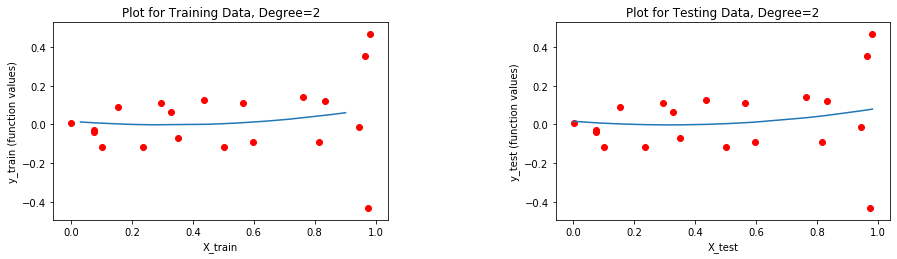

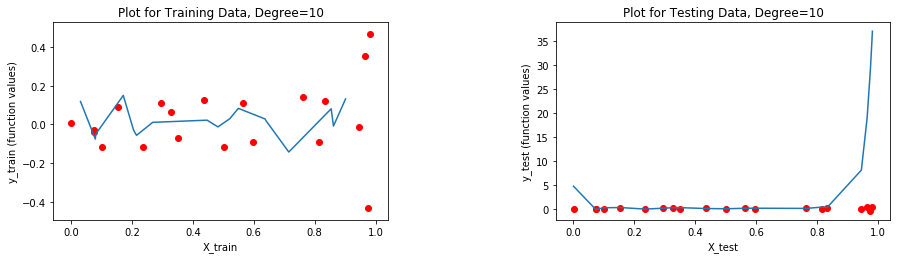

In [279]:
#!pip install tabulate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as mse
from IPython.display import HTML, display
import tabulate


def fit_model(degree):
    polynomial_features = PolynomialFeatures(degree)
    X_train_transformed = polynomial_features.fit_transform(X_train.reshape(-1,1))
    X_test_transformed = polynomial_features.fit_transform(X_test.reshape(-1,1))

    model = LinearRegression()
    model.fit(X_train_transformed,y_train)
    Y_tr=model.predict(X_train_transformed)
    mse_train=mse(y_train,Y_tr)
    #print("Training Error: ",mse(y_train,Y_tr))

    Y_ts=model.predict(X_test_transformed)
    mse_test=mse(y_test,Y_ts)
    #print("Testing Error: ",mse(y_test,Y_ts))
    
    fig = plt.figure()
    fig.set_figheight(8)
    fig.set_figwidth(15)
    fig.subplots_adjust(wspace=0.5)
    plt.subplot(2, 2, 1)
    plt.scatter(X_test,y_test,c='r')
    plt.plot(X_train,Y_tr)
    plt.title('Plot for Training Data, Degree=%d'%degree)
    plt.xlabel('X_train')
    plt.ylabel('y_train (function values)')

    plt.subplot(2, 2, 2)
    plt.scatter(X_test,y_test,c='r')
    plt.plot(X_test,Y_ts)
    plt.title('Plot for Testing Data, Degree=%d'%degree)
    plt.xlabel('X_test')
    plt.ylabel('y_test (function values)')
    model="Degree %d Model"%degree
        
        
    table = [[model,"Train Error","Test Error"],
             ["Mean Squared Error",mse_train,mse_test],
            ]
    display(HTML(tabulate.tabulate(table, tablefmt='html')))
    print()

fit_model(2)
fit_model(10)


##### This target doesn't have noise like the previous one. Does this make the result surprising?

--> The resut is surprising as we would expect the model to have a very low testing and training error (perfect-fit) as there is no added noise on the dataset. But depending on the data sometimes we are getting a high testing error! (ex: testing error of 132.20461482866813 on degree 10 model)

--> This is due to the higher degree of dataset (degree 45), so that we have a large variations within the dataset itself. This does not allow our algorithm to perfectly generalize on the test set.

--> We can verify this by creating a model of lower degree, ex degree 10 as in previous task, and we will get a near-perfect fit on the test data as well.

Degree 2 Model,Train Error,Test Error
Mean Squared Error,0.02663722089812407,0.06132201488679391


Degree 10 Model,Train Error,Test Error
Mean Squared Error,5.289291184277496e-29,1.5169733654877645e-24


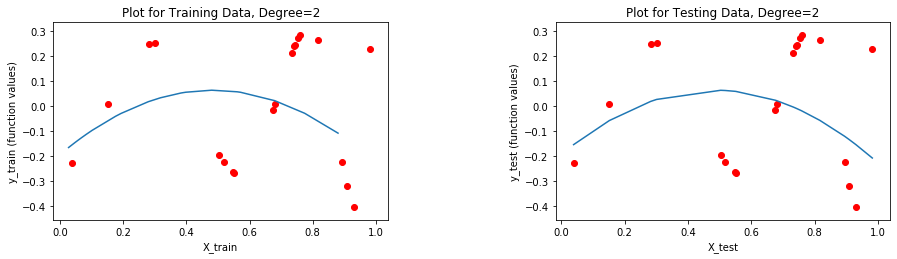

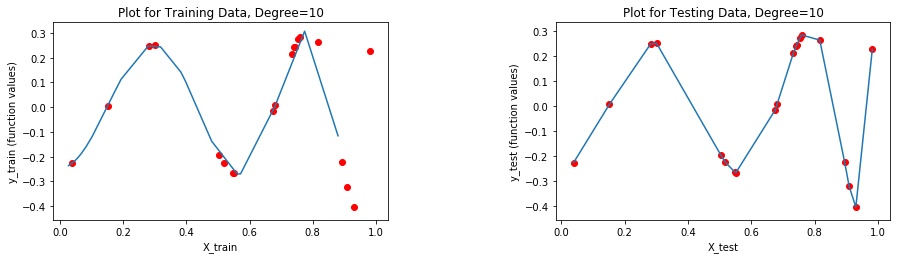

In [282]:
#Experimentation code

X_train, y_train, X_test, y_test=generate_dataset_noNoise(10,20,20)

#!pip install tabulate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as mse
from IPython.display import HTML, display
import tabulate


def fit_model(degree):
    polynomial_features = PolynomialFeatures(degree)
    X_train_transformed = polynomial_features.fit_transform(X_train.reshape(-1,1))
    X_test_transformed = polynomial_features.fit_transform(X_test.reshape(-1,1))

    model = LinearRegression()
    model.fit(X_train_transformed,y_train)
    Y_tr=model.predict(X_train_transformed)
    mse_train=mse(y_train,Y_tr)
    #print("Training Error: ",mse(y_train,Y_tr))

    Y_ts=model.predict(X_test_transformed)
    mse_test=mse(y_test,Y_ts)
    #print("Testing Error: ",mse(y_test,Y_ts))
    
    fig = plt.figure()
    fig.set_figheight(8)
    fig.set_figwidth(15)
    fig.subplots_adjust(wspace=0.5)
    plt.subplot(2, 2, 1)
    plt.scatter(X_test,y_test,c='r')
    plt.plot(X_train,Y_tr)
    plt.title('Plot for Training Data, Degree=%d'%degree)
    plt.xlabel('X_train')
    plt.ylabel('y_train (function values)')

    plt.subplot(2, 2, 2)
    plt.scatter(X_test,y_test,c='r')
    plt.plot(X_test,Y_ts)
    plt.title('Plot for Testing Data, Degree=%d'%degree)
    plt.xlabel('X_test')
    plt.ylabel('y_test (function values)')
    model="Degree %d Model"%degree
        
        
    table = [[model,"Train Error","Test Error"],
             ["Mean Squared Error",mse_train,mse_test],
            ]
    display(HTML(tabulate.tabulate(table, tablefmt='html')))
    print()

fit_model(2)
fit_model(10)
